In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

import os
os.chdir('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/KAG_conversion_data.csv')

In [ ]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None


In [ ]:
data.interest.value_counts().count()

40

In [ ]:
data.xyz_campaign_id.value_counts().count()

3

In [ ]:
data.fb_campaign_id.value_counts().count()

691

In [ ]:
data.isnull().sum()

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


In [ ]:
#change 'interest' data type to object as they reprecent a category rather than a value
data.astype({'interest': 'object'}).dtypes

,0
ad_id,int64
xyz_campaign_id,int64
fb_campaign_id,int64
age,object
gender,object
interest,object
Impressions,int64
Clicks,int64
Spent,float64
Total_Conversion,int64


In [ ]:
# Investigating variables
for i in data.columns:
    if data[i].nunique() < 10:
        print(f'The column "{i}" is {data[i].dtype} and has {data[i].nunique()} unique values: \n{data[i].value_counts()}')
        print(40*'==')
    else:
        print(f'The column "{i}" is {data[i].dtype} and has {data[i].nunique()} unique values')
        print(40*'==')

The column "ad_id" is int64 and has 1143 unique values
The column "xyz_campaign_id" is int64 and has 3 unique values: 
xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64
The column "fb_campaign_id" is int64 and has 691 unique values
The column "age" is object and has 4 unique values: 
age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64
The column "gender" is object and has 2 unique values: 
gender
M    592
F    551
Name: count, dtype: int64
The column "interest" is int64 and has 40 unique values
The column "Impressions" is int64 and has 1130 unique values
The column "Clicks" is int64 and has 183 unique values
The column "Spent" is float64 and has 869 unique values
The column "Total_Conversion" is int64 and has 32 unique values
The column "Approved_Conversion" is int64 and has 16 unique values


In [ ]:
data['Approved_Conversion'].unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering - Replace Clicks with CTR and Conversions with Conversion Rates
data['CTR'] = data['Clicks'] / data['Impressions']
data['Approved_Conversion_per_Click'] = data['Approved_Conversion'] / data['Clicks']
data['Total_Conversion_per_Click'] = data['Total_Conversion'] / data['Clicks']

In [ ]:
# Replace infinities and NaN values
data['CTR'] = data['CTR'].replace([float('inf'), -float('inf')], 0)
data['Approved_Conversion_per_Click'] = data['Approved_Conversion_per_Click'].replace([float('inf'), -float('inf')], 0)
data['Total_Conversion_per_Click'] = data['Total_Conversion_per_Click'].replace([float('inf'), -float('inf')], 0)

# Fill NaN values in the entire DataFrame
data.fillna(0, inplace=True)

In [ ]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Approved_Conversion_per_Click,Total_Conversion_per_Click
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.0,2.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.0,1.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.0,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,0.0,1.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.0,1.0


In [ ]:
data.isna().sum()

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


In [ ]:
data.drop(columns=['Clicks', 'Approved_Conversion','Total_Conversion'], inplace=True)

In [ ]:
data['xyz_campaign_id'] = data['xyz_campaign_id'].replace({916: 'campaign_a', 936: 'campaign_b', 1178: 'campaign_c'}) #mapping for better visualisation

In [ ]:
# Summary statistics for numerical columns
data.describe()

,ad_id,fb_campaign_id,interest,Impressions,Spent,CTR,Approved_Conversion_per_Click,Total_Conversion_per_Click
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,51.360656,0.000164,0.089285,0.241699
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,86.908418,0.000115,0.227438,0.368381
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.480000,0.000100,0.000000,0.028571
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,12.370000,0.000160,0.000000,0.090909
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,60.025000,0.000234,0.045455,0.250000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,639.949998,0.001059,2.000000,4.000000


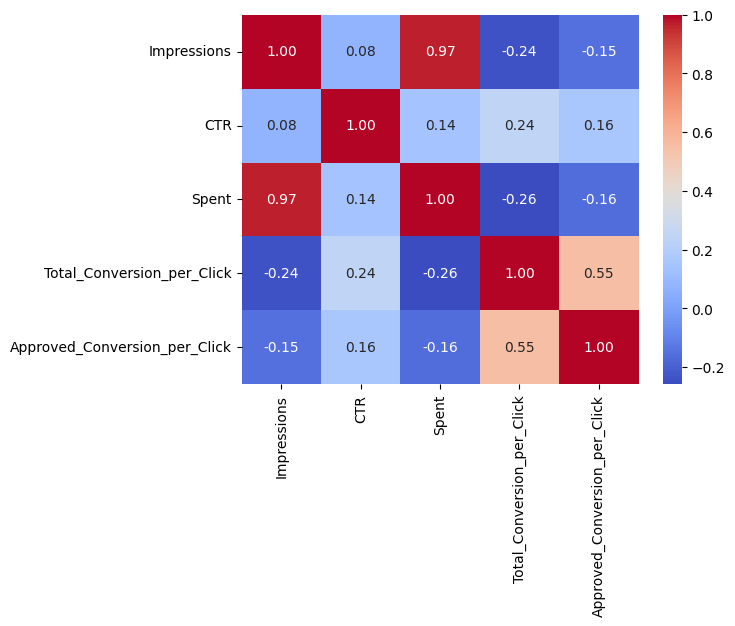

In [ ]:
# Correlation matrix for numeric features
g=sns.heatmap(data[["Impressions","CTR","Spent","Total_Conversion_per_Click","Approved_Conversion_per_Click"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

## Exploratory Data Analysis

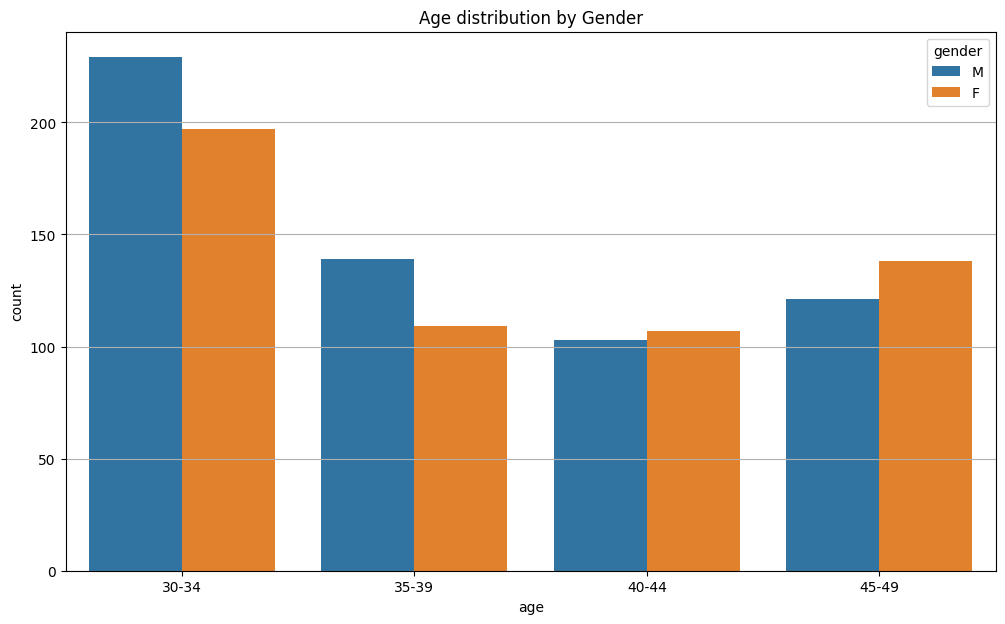

In [ ]:
# Initialize the figure with a specified size
fig = plt.figure(figsize=(12, 7))

# Create a countplot for 'age' with 'gender' as hue
sns.countplot(data=data, x='age', hue='gender')
plt.title('Age distribution by Gender')
plt.grid(axis='y')

# Show the plot
plt.show()

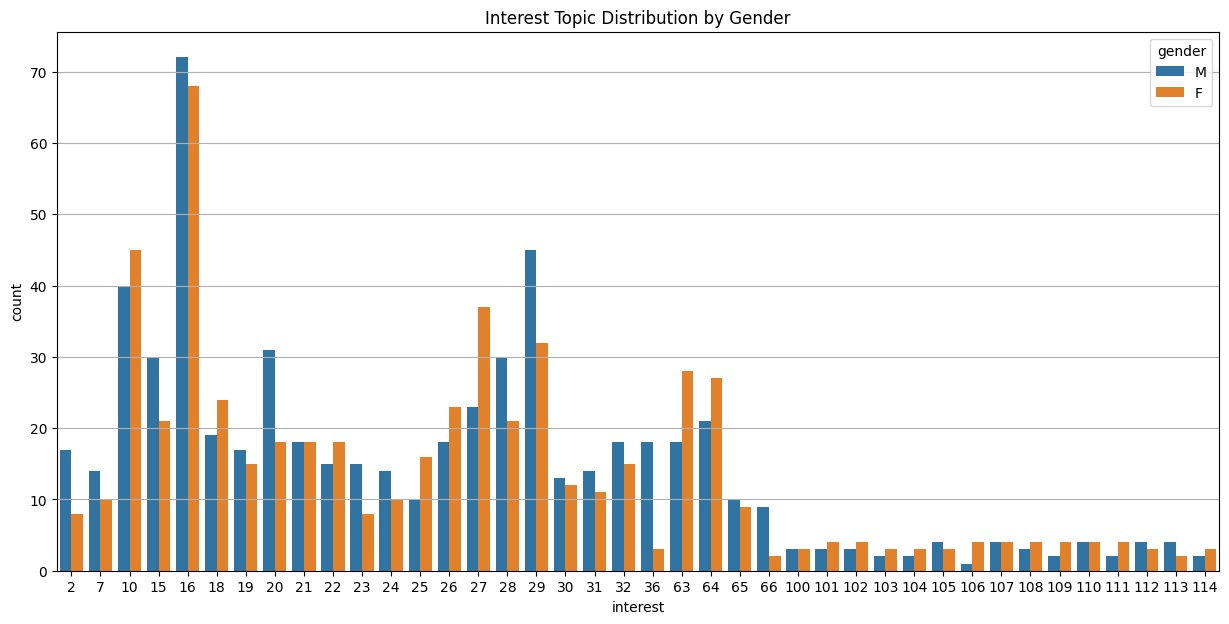

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(15, 7))

# Create a count plot for the distribution of interests by gender
sns.countplot(data=data, x='interest', hue='gender')

# Set the title of the plot
plt.title('Interest Topic Distribution by Gender')
plt.grid(axis='y')

# Show the plot
plt.show()

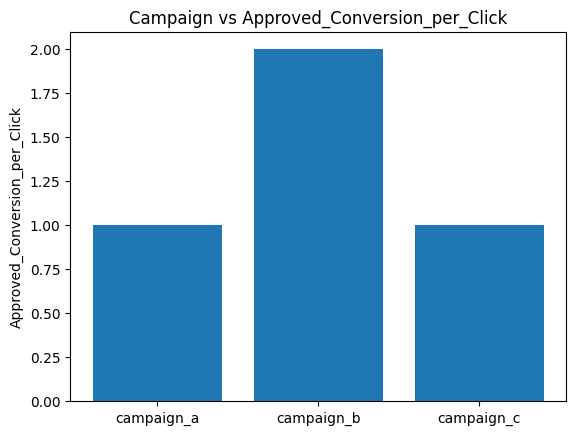

In [ ]:
#Approved_Conversion
# Creating  bar plot
plt.bar(data["xyz_campaign_id"], data["Approved_Conversion_per_Click"])
plt.ylabel("Approved_Conversion_per_Click")
plt.title("Campaign vs Approved_Conversion_per_Click")
plt.show()

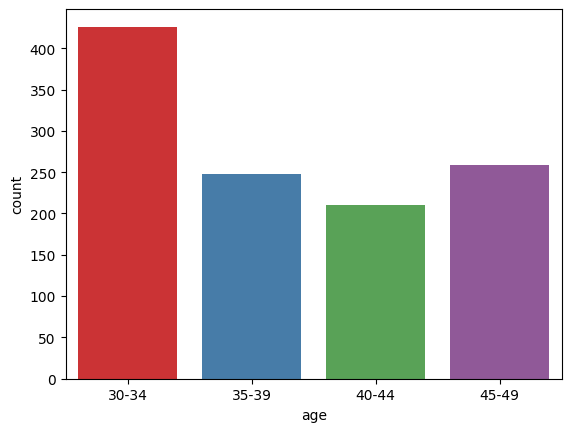

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='age', data = data, hue='age', palette='Set1', legend=False)
# Show the plot
plt.show()

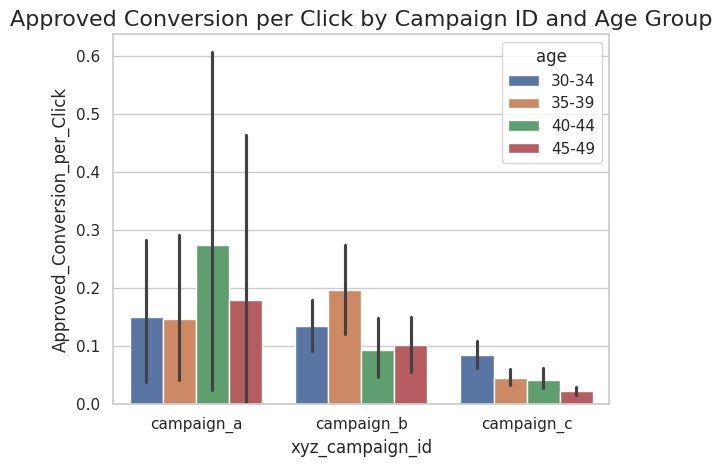

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=data["xyz_campaign_id"], y=data["Approved_Conversion_per_Click"], hue=data["age"], data=tips)
plt.title('Approved Conversion per Click by Campaign ID and Age Group', fontsize=16)
plt.show()

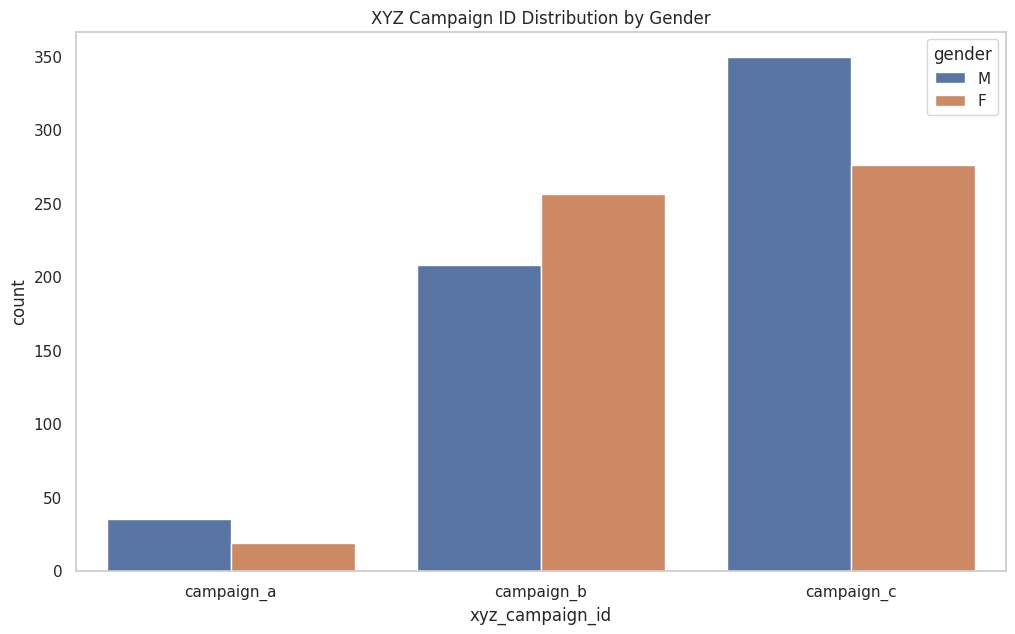

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(12, 7))

# Create a count plot for the distribution of xyz_campaign_id by gender
sns.countplot(data=data, x='xyz_campaign_id', hue='gender')

# Set the title of the plot
plt.title('XYZ Campaign ID Distribution by Gender')
plt.grid(axis='y')

# Show the plot
plt.show()

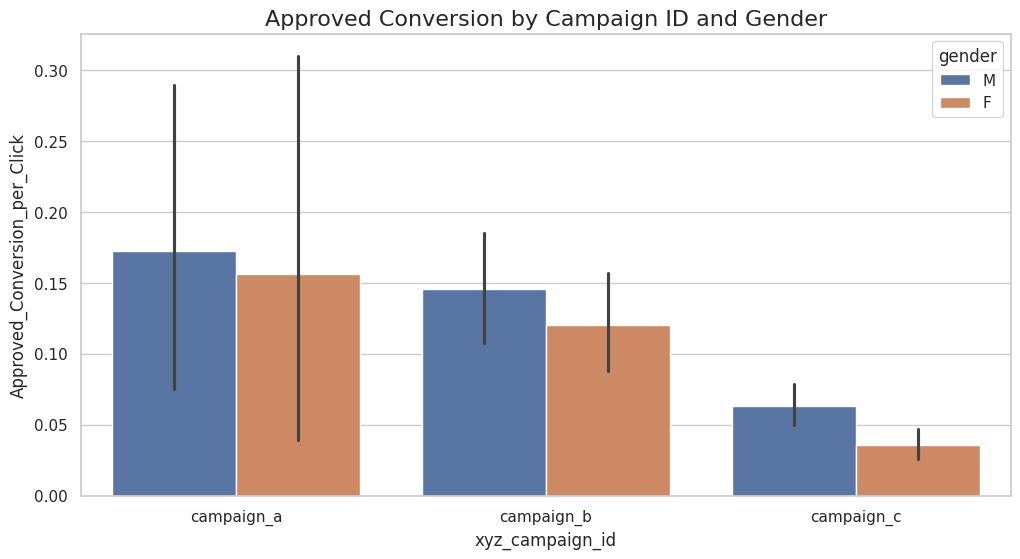

In [ ]:
sns.set(style="whitegrid")

# Bar plot for 'xyz_campaign_id' vs 'Approved_Conversion' with hue based on 'gender'
plt.figure(figsize=(12, 6))
sns.barplot(x=data["xyz_campaign_id"], y=data["Approved_Conversion_per_Click"], hue=data["gender"])

# Title for the plot
plt.title('Approved Conversion by Campaign ID and Gender', fontsize=16)
plt.show()

In [ ]:
#change 'interest' data type to object as they reprecent a category rather than a value
data.astype({'interest': 'object'}).dtypes

,0
ad_id,int64
xyz_campaign_id,object
fb_campaign_id,int64
age,object
gender,object
interest,object
Impressions,int64
Spent,float64
CTR,float64
Approved_Conversion_per_Click,float64


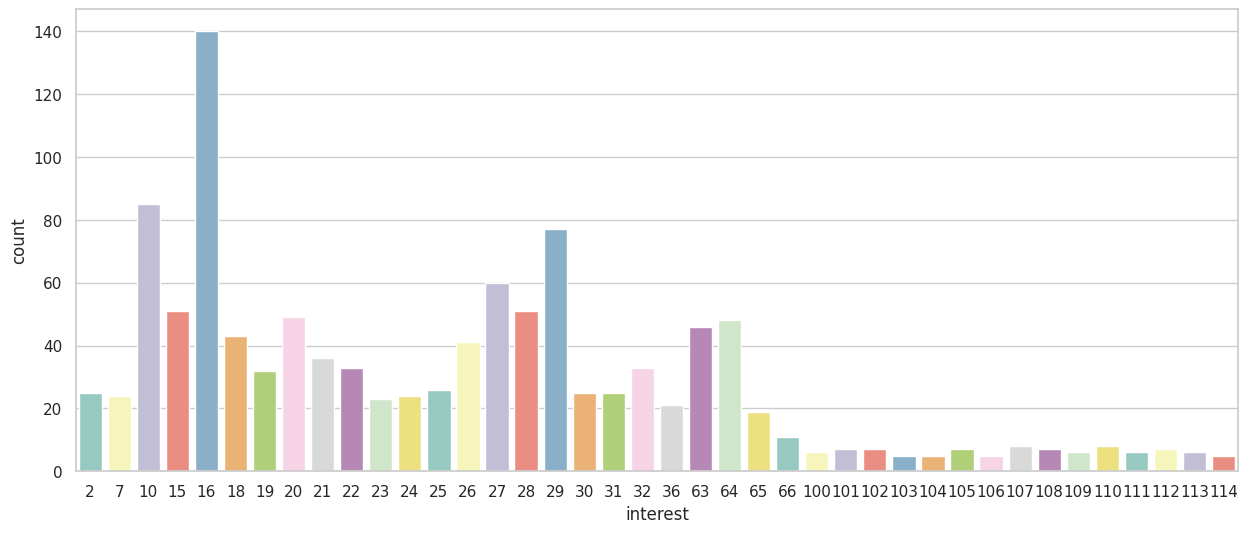

In [ ]:
# count plot on single categorical variable
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = data, hue='interest', palette='Set3', legend=False)
# Show the plot
plt.show()

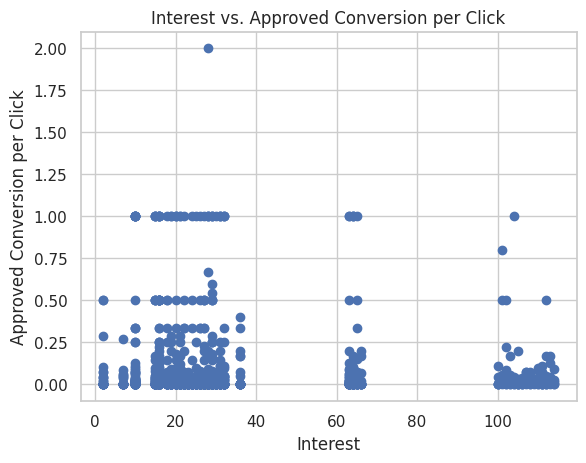

In [ ]:
plt.scatter(data["interest"], data["Approved_Conversion_per_Click"])
plt.title("Interest vs. Approved Conversion per Click")
plt.xlabel("Interest")
plt.ylabel("Approved Conversion per Click")
plt.show()

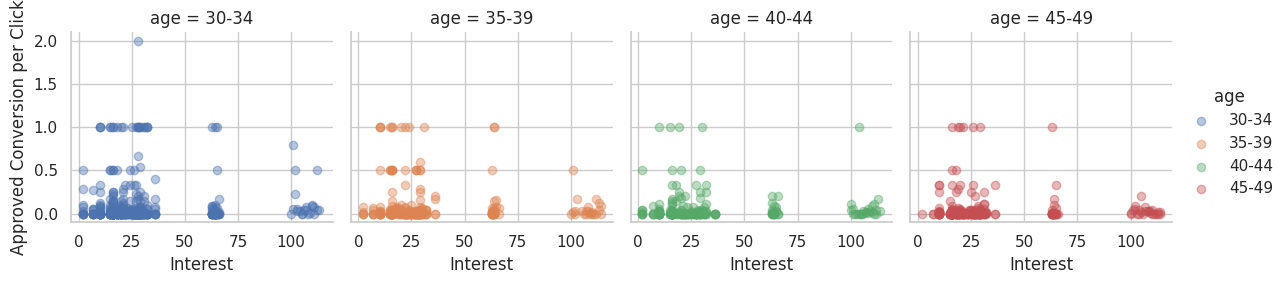

In [ ]:
g = sns.FacetGrid(data, col="age", hue = 'age')
g.map(plt.scatter, "interest", "Approved_Conversion_per_Click", alpha=.4)
g.add_legend()
g.set_axis_labels("Interest", "Approved Conversion per Click")

<ipython-input-34-1cb424680a61>:8: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.5, hspace=0.8)


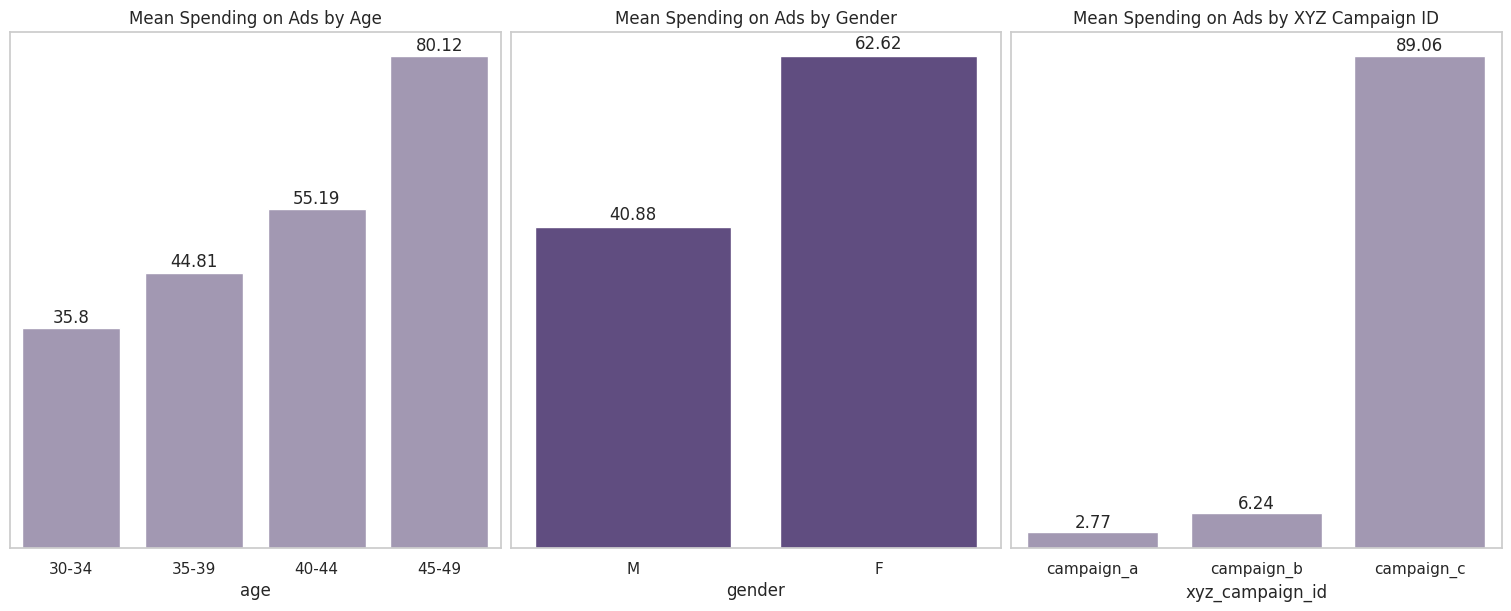

In [ ]:
# Calculate average spending
avg_spending_age = data.groupby('age')['Spent'].mean().sort_values().reset_index()
avg_spending_gender = data.groupby('gender')['Spent'].mean().sort_values().reset_index()
avg_spending_xyz = data.groupby('xyz_campaign_id')['Spent'].mean().sort_values().reset_index()

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=[15, 6], constrained_layout=True)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Mean spending on ads by age
ax = sns.barplot(ax=axes[0], data=avg_spending_age, x='age', y='Spent', color='#A194B6')
ax.set_title('Mean Spending on Ads by Age')
ax.set_yticks([])
ax.set_ylabel('')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            round(avg_spending_age['Spent'][i], 2), ha="center")
    i += 1

# Mean spending on ads by gender
ax1 = sns.barplot(ax=axes[1], data=avg_spending_gender, x='gender', y='Spent', color='#5E4489')
ax1.set_title('Mean Spending on Ads by Gender')
ax1.set_yticks([])
ax1.set_ylabel('')
i = 0
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 1,
             round(avg_spending_gender['Spent'][i], 2), ha="center")
    i += 1

# Third plot: Mean spending on ads by XYZ campaign ID
ax2 = sns.barplot(ax=axes[2], data=avg_spending_xyz, x='xyz_campaign_id', y='Spent', color='#A194B6')
ax2.set_title('Mean Spending on Ads by XYZ Campaign ID')
ax2.set_yticks([])
ax2.set_ylabel('')
i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 1,
             round(avg_spending_xyz['Spent'][i], 2), ha="center")
    i += 1

# Show the plot
plt.show()

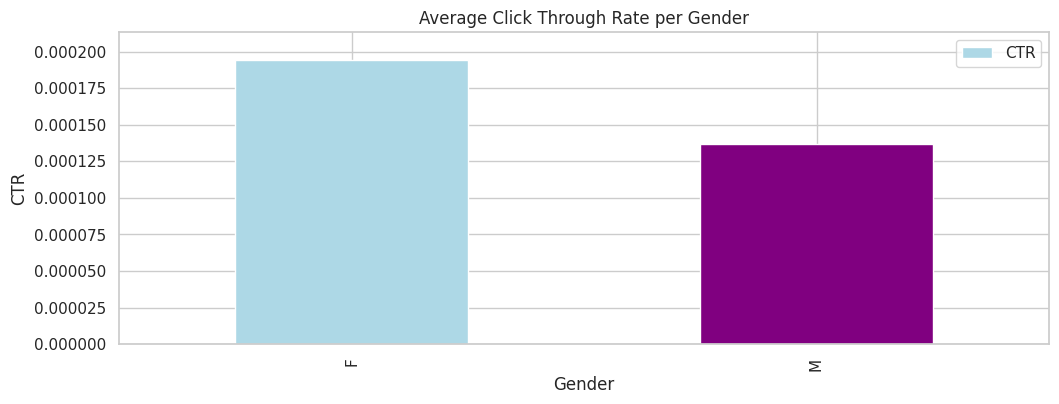

In [ ]:
# Calculate average CTR by gender
AdSpend = data.groupby('gender').agg({'CTR': 'mean'}).reset_index()

# Plotting the average CTR per Gender
AdSpend.plot.bar(x='gender', y='CTR', figsize=(12, 4), color = ['lightblue','purple'])
plt.xlabel('Gender')
plt.ylabel('CTR')
plt.title('Average Click Through Rate per Gender')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.10)
plt.show()

In [ ]:
# Set pandas option to handle downcasting as per future behavior
pd.set_option('future.no_silent_downcasting', True)

# Replacing xyz_campaign_ids again with actual ids for modelling
data["xyz_campaign_id"] = data["xyz_campaign_id"].replace({"campaign_a": 916, "campaign_b": 936, "campaign_c": 1178})

In [ ]:
# Encoding the Labels 'gender' and 'age' for better modelling

#encoding gender
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data["gender"])
data["gender"]=encoder.transform(data["gender"])
data["gender"].unique()

array([1, 0])

In [ ]:
#encoding age
encoder.fit(data["age"])
data["age"]=encoder.transform(data["age"])
data["age"].unique()

array([0, 1, 2, 3])

##Clustering

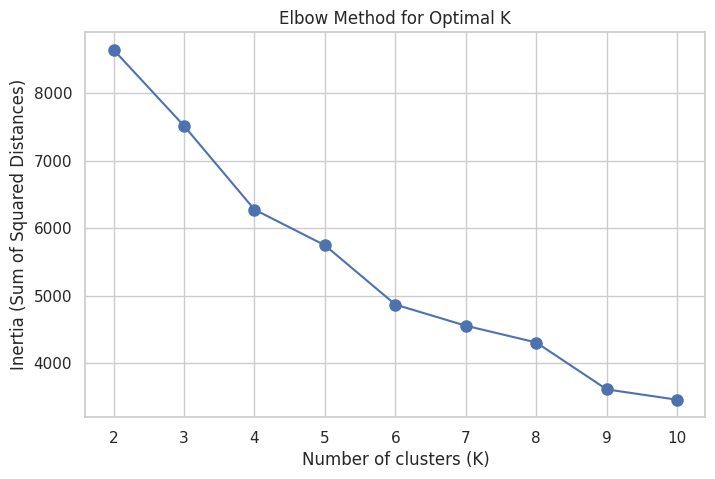

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Dropping the 'ad_id' column for clustering
data_clustering = data.drop(['ad_id'], axis=1)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Elbow Method to find optimal K
inertia = []  # List to hold inertia (sum of squared distances) values
k_range = range(2, 11)  # K values

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Silhouette Score to validate the optimal K
silhouette_scores = []  # List to hold silhouette score values

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [ ]:
# Printing the best K based on the highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {optimal_k}")

The optimal number of clusters based on Silhouette Score is: 10


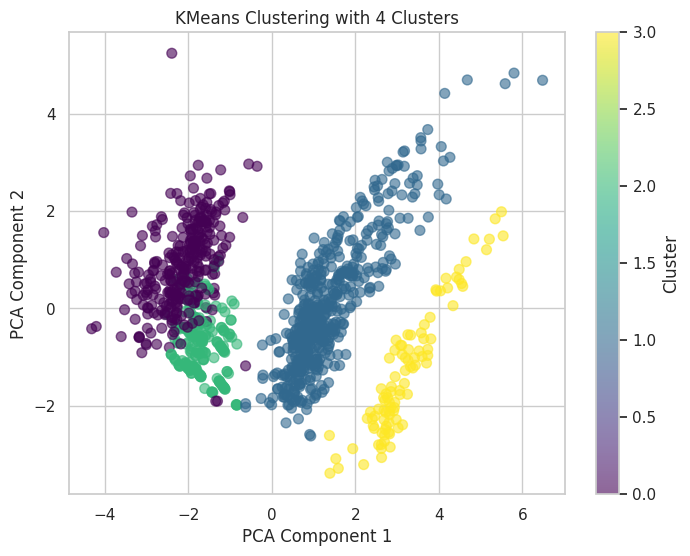

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans with 4 clusters (based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Perform PCA for visualization (reduce dimensions to 2 for plotting)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for plotting with PCA components and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title("KMeans Clustering with 4 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Get the centroids (cluster centers) in the original feature space
centroids = kmeans.cluster_centers_

# Inverse transform the centroids to original scale (since we scaled the data)
centroids_original = scaler.inverse_transform(centroids)

# Create a DataFrame for easy viewing of the cluster centers
centroid_df = pd.DataFrame(centroids_original, columns=data.columns[:-1])  # Exclude 'Cluster' column
centroid_df.index = [f'Cluster {i}' for i in range(1, len(centroids)+1)]  # Rename index for clarity

# Print the cluster centroids (boundaries) in a table format
print("Cluster Centroids (Boundaries):")
print(centroid_df.to_string(index=True))

Cluster Centroids (Boundaries):
                  ad_id  xyz_campaign_id  fb_campaign_id       age    gender    interest    Impressions      Spent       CTR  Approved_Conversion_per_Click  Total_Conversion_per_Click
Cluster 1  7.849618e+05       936.217822   114141.732673  1.392739  0.399340   24.557756   24548.320132   9.368416  0.000274                       0.239663                    0.594176
Cluster 2  1.121655e+06      1178.000000   144631.660342  1.330171  0.576850   27.345351  325729.421252  90.675920  0.000167                       0.042504                    0.135038
Cluster 3  8.010089e+05       934.073394   114753.577982  0.798165  0.568807   24.931193    5676.353211   0.962706  0.000015                       0.002146                    0.035993
Cluster 4  1.314359e+06      1178.000000   179926.210526  1.557895  0.452632  107.000000  348419.336842  82.847579  0.000139                       0.069124                    0.181218


In [ ]:
import pandas as pd

# Get the min-max feature ranges for each cluster
cluster_boundaries = data_clustering.groupby(data['Cluster']).agg(['min', 'max'])

# Flatten the multi-level columns and create more readable column names
cluster_boundaries.columns = [f"{col[0]} ({col[1]})" for col in cluster_boundaries.columns]

# Display the cluster boundaries (min-max ranges) for each feature in tabular format
print("Cluster Boundaries (Min-Max ranges):")
print(cluster_boundaries.to_string())

Cluster Boundaries (Min-Max ranges):
        xyz_campaign_id (min) xyz_campaign_id (max)  fb_campaign_id (min)  fb_campaign_id (max)  age (min)  age (max)  gender (min)  gender (max)  interest (min)  interest (max)  Impressions (min)  Impressions (max)  Spent (min)  Spent (max)  CTR (min)  CTR (max)  Approved_Conversion_per_Click (min)  Approved_Conversion_per_Click (max)  Total_Conversion_per_Click (min)  Total_Conversion_per_Click (max)
Cluster                                                                                                                                                                                                                                                                                                                                                                                                              
0                         916                  1178                103916                144663          0          3             0             1      

In [ ]:
data = data.drop(columns=['Cluster'])

## Predictive Analysis - Regression

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and target
X = data.drop(columns=['Approved_Conversion_per_Click', 'Total_Conversion_per_Click'])
y = data['Approved_Conversion_per_Click']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Linear Regression
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Output the evaluation metrics
print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression R-squared: {r2_linear:.4f}")

Linear Regression MSE: 0.0622
Linear Regression R-squared: 0.1008


In [ ]:
# 2. Random Forest Regression
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the evaluation metrics
print(f"Random Forest Regression MSE: {mse_rf:.4f}")
print(f"Random Forest Regression R-squared: {r2_rf:.4f}")

Random Forest Regression MSE: 0.0463
Random Forest Regression R-squared: 0.3305


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned Random Forest model
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest MSE: {mse_rf_tuned:.4f}")
print(f"Tuned Random Forest R-squared: {r2_rf_tuned:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest MSE: 0.0437
Tuned Random Forest R-squared: 0.3689


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a Lasso regression model
lasso = Lasso()

# Define a range of values for the alpha parameter
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search for optimal alpha
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
grid_search_lasso.fit(X_train, y_train)

# Best parameter found by GridSearchCV
print(f"Best Alpha: {grid_search_lasso.best_params_}")

# Use the best model to predict
y_pred_lasso = grid_search_lasso.best_estimator_.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MAE: {mae_lasso:.4f}")
print(f"Lasso MSE: {mse_lasso:.4f}")
print(f"Lasso RMSE: {rmse_lasso:.4f}")
print(f"Lasso R2 Score: {r2_lasso:.4f}")

Best Alpha: {'alpha': 100}
Lasso MAE: 0.1472
Lasso MSE: 0.0667
Lasso RMSE: 0.2584
Lasso R2 Score: 0.0351


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting model
gb = GradientBoostingRegressor()

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search for optimal parameters
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search_gb.best_params_}")

# Use the best model to predict
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {mae_gb:.4f}")
print(f"Gradient Boosting MSE: {mse_gb:.4f}")
print(f"Gradient Boosting RMSE: {rmse_gb:.4f}")
print(f"Gradient Boosting R2 Score: {r2_gb:.4f}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting MAE: 0.1227
Gradient Boosting MSE: 0.0501
Gradient Boosting RMSE: 0.2239
Gradient Boosting R2 Score: 0.2751


## Predictive Analysis - Classification

In [ ]:
# Define the target variable (binary classification based on a threshold)
threshold = 0.5  # Define your threshold
data['target'] = (data['Approved_Conversion_per_Click'] > threshold).astype(int)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets before feature-target separation
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42, stratify=data['target'])

# Separate features and target for the case with 'Total_Conversion_per_Click'
excluded_features_with_total = ['Approved_Conversion_per_Click', 'target', 'ad_id']
X_train_with_total = pd.get_dummies(train_data.drop(columns=excluded_features_with_total), drop_first=True)
y_train_with_total = train_data['target']
X_test_with_total = pd.get_dummies(test_data.drop(columns=excluded_features_with_total), drop_first=True)
y_test_with_total = test_data['target']

# Align train and test data to ensure they have the same columns for "with Total_Conversion"
X_train_with_total, X_test_with_total = X_train_with_total.align(X_test_with_total, join='left', axis=1, fill_value=0)

# Separate features and target for the case without 'Total_Conversion_per_Click'
excluded_features_without_total = ['Approved_Conversion_per_Click', 'Total_Conversion_per_Click', 'target', 'ad_id']
X_train_without_total = pd.get_dummies(train_data.drop(columns=excluded_features_without_total), drop_first=True)
y_train_without_total = train_data['target']
X_test_without_total = pd.get_dummies(test_data.drop(columns=excluded_features_without_total), drop_first=True)
y_test_without_total = test_data['target']

# Align train and test data to ensure they have the same columns for "without Total_Conversion"
X_train_without_total, X_test_without_total = X_train_without_total.align(X_test_without_total, join='left', axis=1, fill_value=0)

# Resampling to balance classes in the training set (for both cases)
# With 'Total_Conversion_per_Click'
high_conversion_data_with_total = X_train_with_total[y_train_with_total == 1]  # Class 1 (high conversion)
low_conversion_data_with_total = X_train_with_total[y_train_with_total == 0].sample(n=len(high_conversion_data_with_total), replace=True, random_state=0)  # Class 0 (low conversion)

X_train_with_total_balanced = pd.concat([high_conversion_data_with_total, low_conversion_data_with_total], axis=0)
y_train_with_total_balanced = pd.concat([y_train_with_total[y_train_with_total == 1], y_train_with_total[y_train_with_total == 0].sample(n=len(high_conversion_data_with_total), replace=True, random_state=0)], axis=0)

# Without 'Total_Conversion_per_Click'
high_conversion_data_without_total = X_train_without_total[y_train_without_total == 1]  # Class 1 (high conversion)
low_conversion_data_without_total = X_train_without_total[y_train_without_total == 0].sample(n=len(high_conversion_data_without_total), replace=True, random_state=0)  # Class 0 (low conversion)

X_train_without_total_balanced = pd.concat([high_conversion_data_without_total, low_conversion_data_without_total], axis=0)
y_train_without_total_balanced = pd.concat([y_train_without_total[y_train_without_total == 1], y_train_without_total[y_train_without_total == 0].sample(n=len(high_conversion_data_without_total), replace=True, random_state=0)], axis=0)

# Standardize (scale) the features for both cases
scaler = StandardScaler()
X_train_with_total_balanced_scaled = scaler.fit_transform(X_train_with_total_balanced)
X_test_with_total_scaled = scaler.transform(X_test_with_total)

X_train_without_total_balanced_scaled = scaler.fit_transform(X_train_without_total_balanced)
X_test_without_total_scaled = scaler.transform(X_test_without_total)

# Models to compare (Logistic Regression, Decision Tree, Random Forest, SVM)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        # Output results
        print(f"\n{model_name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", confusion)
        print("-" * 50)

# Train and evaluate models with 'Total_Conversion_per_Click'
print("Results with 'Total_Conversion_per_Click' feature:")
train_and_evaluate(models, X_train_with_total_balanced_scaled, y_train_with_total_balanced, X_test_with_total_scaled, y_test_with_total)

# Train and evaluate models without 'Total_Conversion_per_Click'
print("\nResults without 'Total_Conversion_per_Click' feature:")
train_and_evaluate(models, X_train_without_total_balanced_scaled, y_train_without_total_balanced, X_test_without_total_scaled, y_test_without_total)

Results with 'Total_Conversion_per_Click' feature:

Logistic Regression Results:
Accuracy: 0.9038
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       327
           1       0.33      1.00      0.49        16

    accuracy                           0.90       343
   macro avg       0.66      0.95      0.72       343
weighted avg       0.97      0.90      0.93       343

Confusion Matrix:
 [[294  33]
 [  0  16]]
--------------------------------------------------

Decision Tree Results:
Accuracy: 0.9329
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       327
           1       0.41      0.94      0.57        16

    accuracy                           0.93       343
   macro avg       0.70      0.94      0.76       343
weighted avg       0.97      0.93      0.95       343

Confusion Matrix:
 [[305  22]
 [  1  15]]
------------------------

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the RandomForest model
random_forest_model = RandomForestClassifier(random_state=42)

# Cross-validation with balanced dataset including 'Total_Conversion_per_Click'
cv_scores_with_total_balanced = cross_val_score(random_forest_model, X_train_with_total_balanced_scaled, y_train_with_total_balanced, cv=5, scoring='accuracy')

# Cross-validation with balanced dataset excluding 'Total_Conversion_per_Click'
cv_scores_without_total_balanced = cross_val_score(random_forest_model, X_train_without_total_balanced_scaled, y_train_without_total_balanced, cv=5, scoring='accuracy')

# Print cross-validation results for the case with 'Total_Conversion_per_Click'
print("Cross-validation results for Random Forest with 'Total_Conversion_per_Click':")
print(f"Mean accuracy: {cv_scores_with_total_balanced.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores_with_total_balanced.std():.4f}")
print("-" * 50)

# Print cross-validation results for the case without 'Total_Conversion_per_Click'
print("Cross-validation results for Random Forest without 'Total_Conversion_per_Click':")
print(f"Mean accuracy: {cv_scores_without_total_balanced.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores_without_total_balanced.std():.4f}")

Cross-validation results for Random Forest with 'Total_Conversion_per_Click':
Mean accuracy: 0.9867
Standard deviation of accuracy: 0.0267
--------------------------------------------------
Cross-validation results for Random Forest without 'Total_Conversion_per_Click':
Mean accuracy: 0.9475
Standard deviation of accuracy: 0.0497


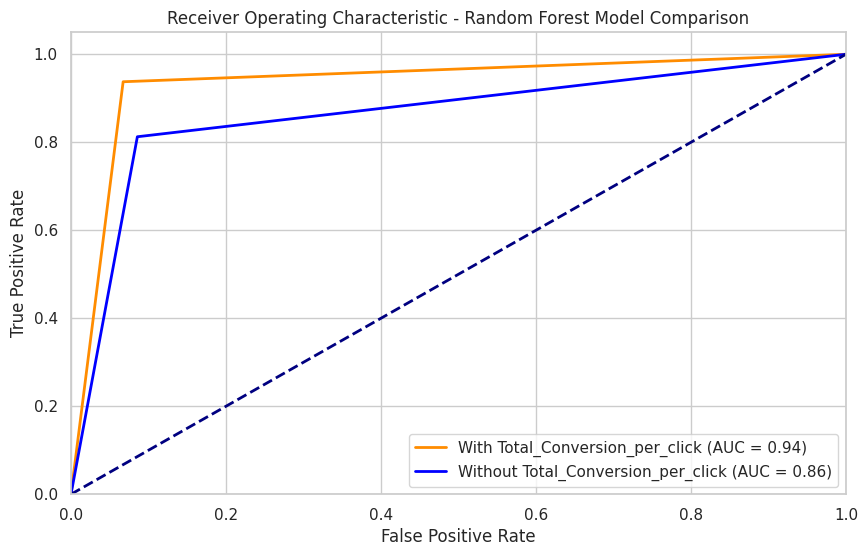

AUC for Random Forest with 'Total_Conversion_per_Click': 0.9351108562691133
AUC for Random Forest without 'Total_Conversion_per_Click': 0.8634365443425076


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train the Random Forest model on the training set for the case with 'Total_Conversion_per_Click'
rf_model_with_total = RandomForestClassifier(random_state=42)
rf_model_with_total.fit(X_train_with_total_balanced_scaled, y_train_with_total_balanced)

# Predict class labels for the test set (binary output)
y_pred_labels_with_total = rf_model_with_total.predict(X_test_with_total_scaled)

# Compute ROC curve and ROC AUC score for the case with 'Total_Conversion_per_Click'
fpr_with_total, tpr_with_total, _ = roc_curve(y_test_with_total, y_pred_labels_with_total)
roc_auc_with_total = roc_auc_score(y_test_with_total, y_pred_labels_with_total)

# Plot ROC curve for the case with 'Total_Conversion_per_Click'
plt.figure(figsize=(10, 6))
plt.plot(fpr_with_total, tpr_with_total, color='darkorange', lw=2, label='With Total_Conversion_per_click (AUC = %0.2f)' % roc_auc_with_total)

# Train the Random Forest model on the training set for the case without 'Total_Conversion_per_Click'
rf_model_without_total = RandomForestClassifier(random_state=42)
rf_model_without_total.fit(X_train_without_total_balanced_scaled, y_train_without_total_balanced)

# Predict class labels for the test set (binary output)
y_pred_labels_without_total = rf_model_without_total.predict(X_test_without_total_scaled)

# Compute ROC curve and ROC AUC score for the case without 'Total_Conversion_per_Click'
fpr_without_total, tpr_without_total, _ = roc_curve(y_test_without_total, y_pred_labels_without_total)
roc_auc_without_total = roc_auc_score(y_test_without_total, y_pred_labels_without_total)

# Plot ROC curve for the case without 'Total_Conversion_per_Click'
plt.plot(fpr_without_total, tpr_without_total, color='blue', lw=2, label='Without Total_Conversion_per_click (AUC = %0.2f)' % roc_auc_without_total)

# Plot reference line (diagonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest Model Comparison')
plt.legend(loc="lower right")
plt.show()

# Print AUC for both cases
print("AUC for Random Forest with 'Total_Conversion_per_Click':", roc_auc_with_total)
print("AUC for Random Forest without 'Total_Conversion_per_Click':", roc_auc_without_total)

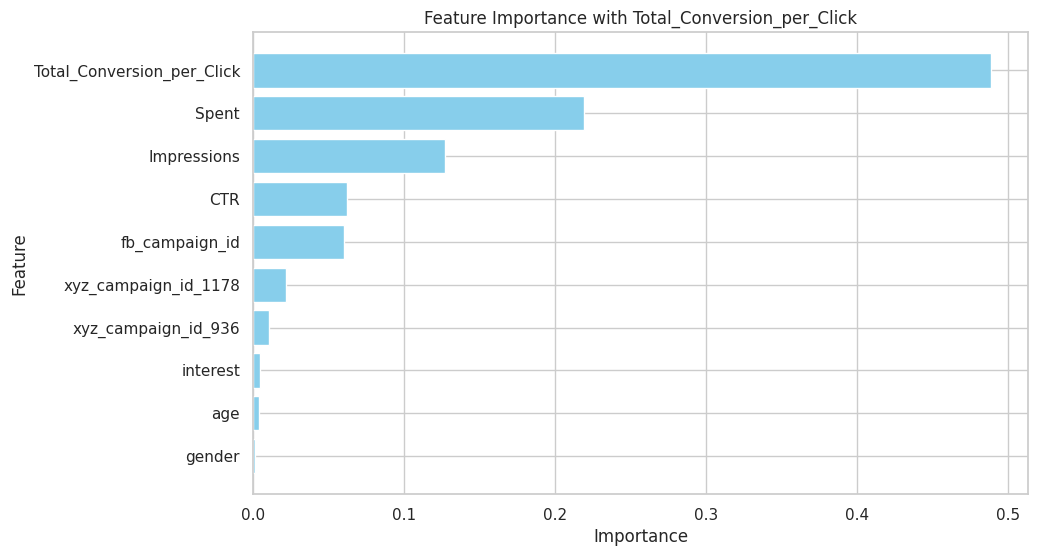

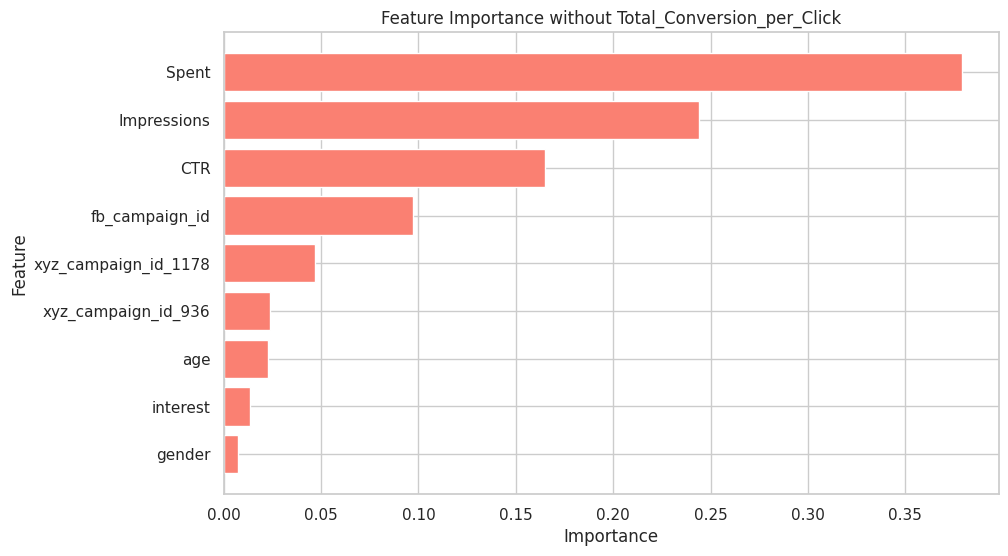

Feature Importance with Total_Conversion_per_Click:
                      Feature  Importance
7  Total_Conversion_per_Click    0.489134
5                       Spent    0.219360
4                 Impressions    0.127296
6                         CTR    0.062391
0              fb_campaign_id    0.060076
9        xyz_campaign_id_1178    0.021841
8         xyz_campaign_id_936    0.010509
3                    interest    0.004379
1                         age    0.003549
2                      gender    0.001465

Feature Importance without Total_Conversion_per_Click:
                Feature  Importance
5                 Spent    0.378934
4           Impressions    0.244158
6                   CTR    0.165071
0        fb_campaign_id    0.097119
8  xyz_campaign_id_1178    0.046893
7   xyz_campaign_id_936    0.023810
1                   age    0.022919
3              interest    0.013755
2                gender    0.007343


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model_with_total = RandomForestClassifier(random_state=42)
rf_model_without_total = RandomForestClassifier(random_state=42)

# Train the Random Forest model for both cases
rf_model_with_total.fit(X_train_with_total_balanced, y_train_with_total_balanced)
rf_model_without_total.fit(X_train_without_total_balanced, y_train_without_total_balanced)

# Get feature importance from the Random Forest models
feature_importances_with_total = rf_model_with_total.feature_importances_
feature_importances_without_total = rf_model_without_total.feature_importances_

# Create DataFrames for visualization
feature_importance_df_with_total = pd.DataFrame({
    'Feature': X_train_with_total.columns,  # Use the feature names from the encoded data
    'Importance': feature_importances_with_total
})

feature_importance_df_without_total = pd.DataFrame({
    'Feature': X_train_without_total.columns,  # Use the feature names from the encoded data
    'Importance': feature_importances_without_total
})

# Sort by importance
feature_importance_df_with_total = feature_importance_df_with_total.sort_values(by='Importance', ascending=False)
feature_importance_df_without_total = feature_importance_df_without_total.sort_values(by='Importance', ascending=False)

# Plot feature importance for both cases
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_with_total['Feature'], feature_importance_df_with_total['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Total_Conversion_per_Click')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_without_total['Feature'], feature_importance_df_without_total['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance without Total_Conversion_per_Click')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

# Print the feature importance rankings
print("Feature Importance with Total_Conversion_per_Click:")
print(feature_importance_df_with_total)
print("\nFeature Importance without Total_Conversion_per_Click:")
print(feature_importance_df_without_total)